In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/user_profiles_for_ads.csv")
print(data.head())

   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data.isnull().sum())

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64


# Exploratory Data Analysis

<ipython-input-4-c122156274c3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0,0], x='Age', data=data, palette='coolwarm')
<ipython-input-4-c122156274c3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0,1], x='Gender', data=data, palette='coolwarm')
<ipython-input-4-c122156274c3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1,0], x='Education Level', data=data, palette='coolwarm')
<ipython-input-4-c122156274c3>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

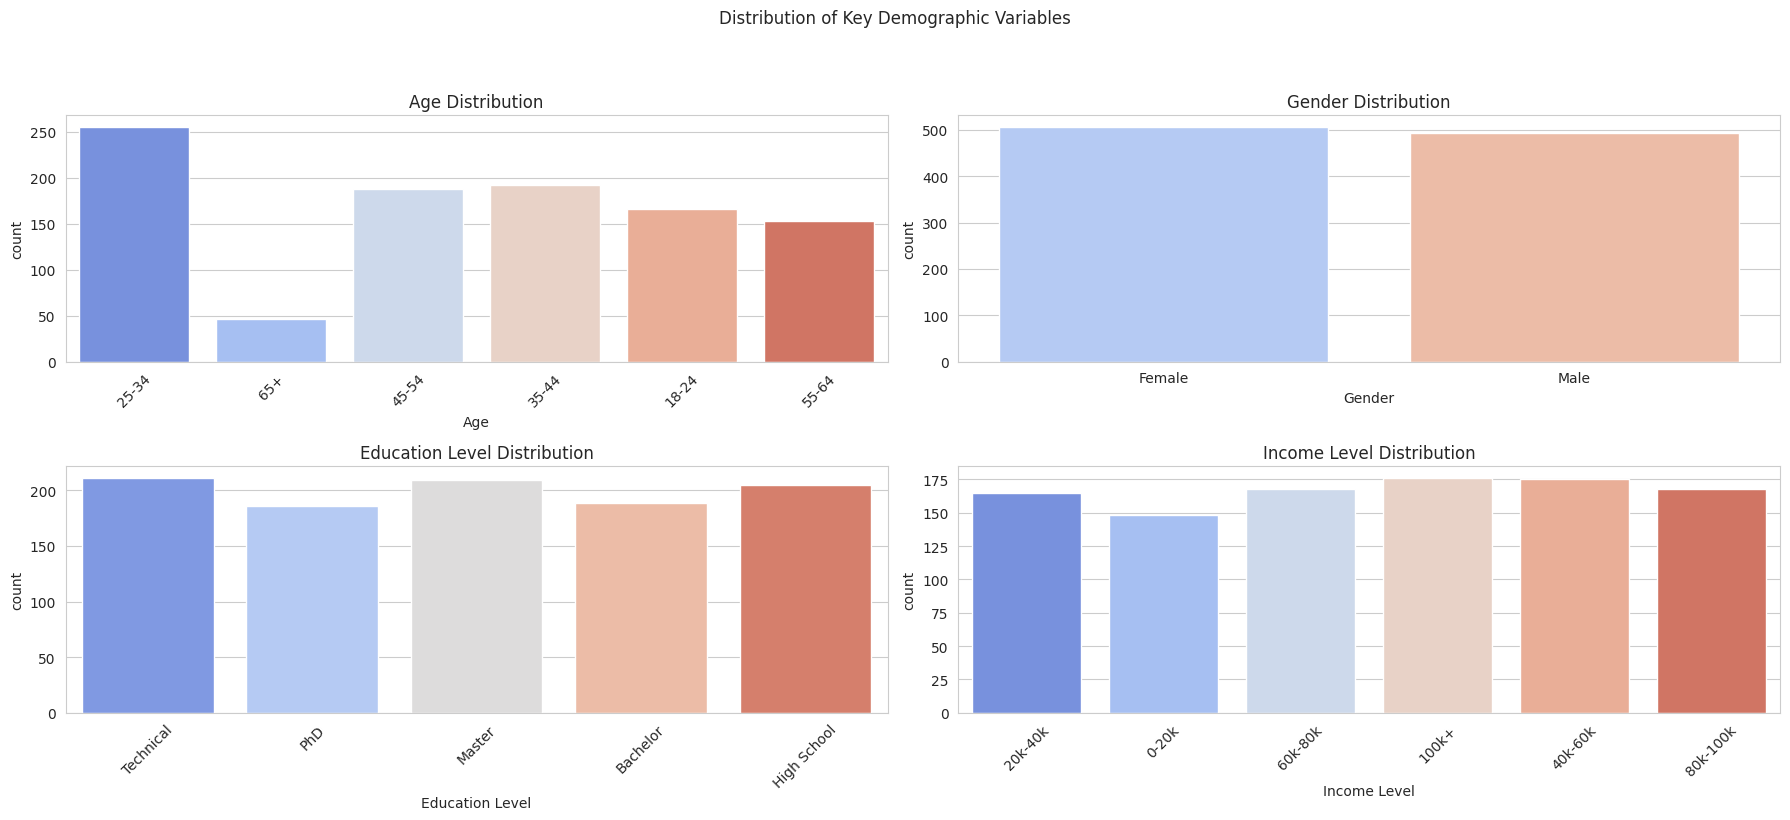

In [ ]:
# Setting the aesthetic style of the plot
sns.set_style("whitegrid")

# Creating subplots for demographic distributions
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Key Demographic Variables')

# Age Distribution
sns.countplot(ax=axes[0,0], x='Age', data=data, palette='coolwarm')
axes[0,0].set_title('Age Distribution')
axes[0,0].tick_params(axis='x', rotation=45)

# Gender Distribution
sns.countplot(ax=axes[0,1], x='Gender', data=data, palette='coolwarm')
axes[0,1].set_title('Gender Distribution')

# Education Level Distribution
sns.countplot(ax=axes[1,0], x='Education Level', data=data, palette='coolwarm')
axes[1,0].set_title('Education Level Distribution')
axes[1,0].tick_params(axis='x', rotation=45)

# Income Level Distribution
sns.countplot(ax=axes[1,1], x='Income Level', data=data, palette='coolwarm')
axes[1,1].set_title('Income Level Distribution')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.3, 1, 0.95])
plt.show()

<ipython-input-5-89b01425bfb9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Device Usage', data=data, palette='coolwarm')


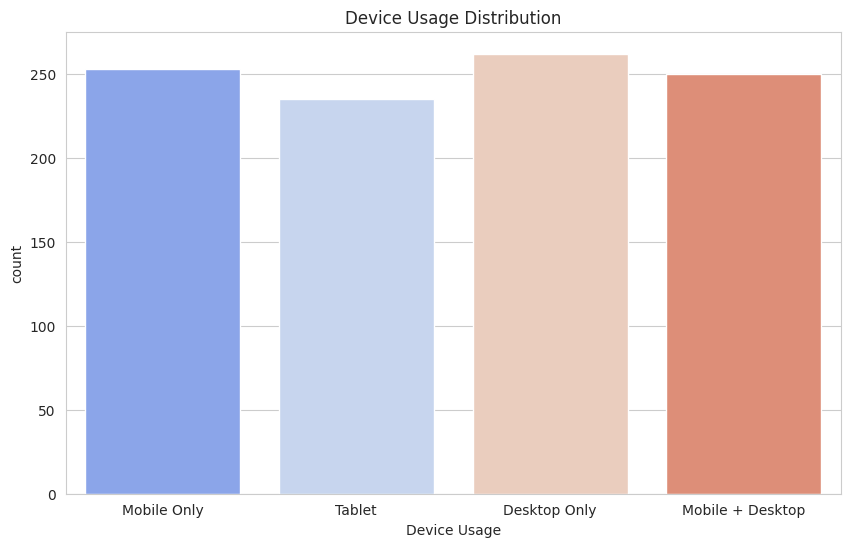

In [ ]:
# Device usage distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Device Usage', data=data, palette='coolwarm')
plt.title('Device Usage Distribution')
plt.show()

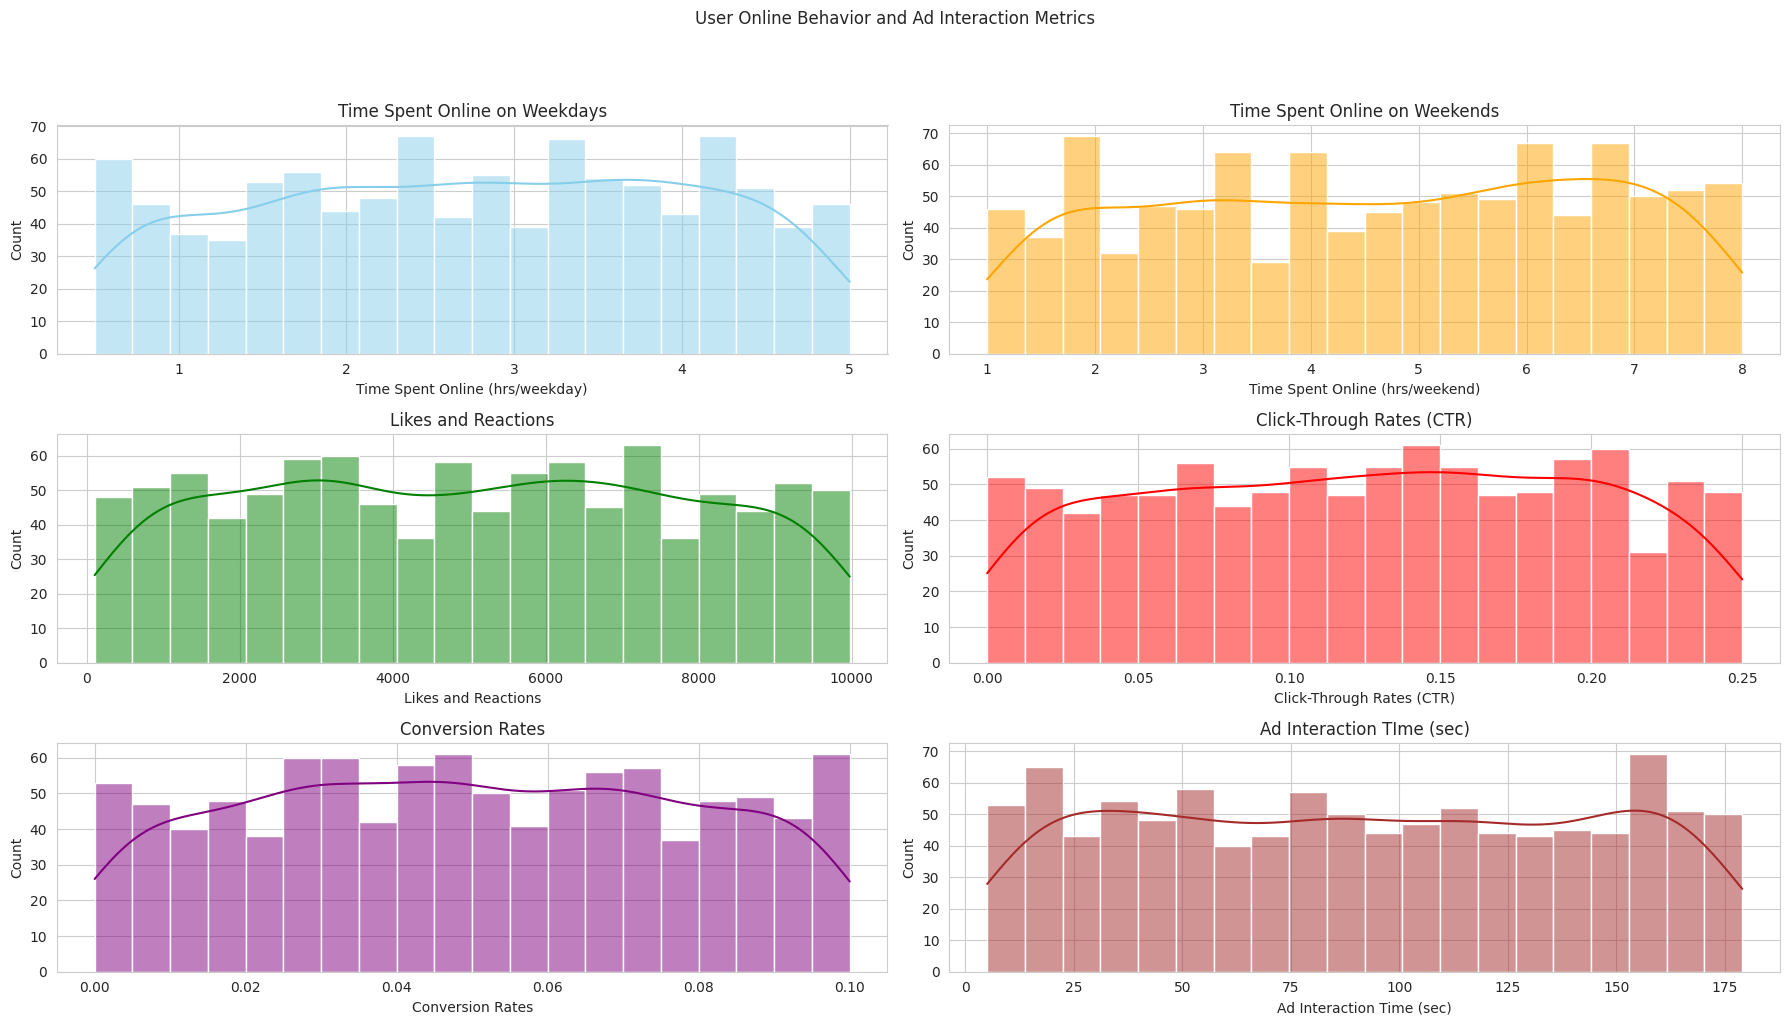

In [ ]:
# Creating subplots for user online behavior and ad interaction
fig, axes = plt.subplots(3, 2, figsize=(18,15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# Time spent online on weekdays
sns.histplot(ax=axes[0,0], x='Time Spent Online (hrs/weekday)', data=data, bins=20, kde=True, color='skyblue')
axes[0,0].set_title('Time Spent Online on Weekdays')

# Time spent online on weekends
sns.histplot(ax=axes[0,1], x='Time Spent Online (hrs/weekend)', data=data, bins=20, kde=True, color='orange')
axes[0,1].set_title('Time Spent Online on Weekends')

# Likes and Reactions
sns.histplot(ax=axes[1,0], x='Likes and Reactions', data=data, bins=20, kde=True, color='green')
axes[1,0].set_title('Likes and Reactions')

# Click-Through Rate
sns.histplot(ax=axes[1,1], x='Click-Through Rates (CTR)', data=data, bins=20, kde=True, color='red')
axes[1,1].set_title('Click-Through Rates (CTR)')

# Conversion Rates
sns.histplot(ax=axes[2,0], x='Conversion Rates', data=data, bins=20, kde=True, color='purple')
axes[2,0].set_title('Conversion Rates')

# Ad Interaction Time
sns.histplot(ax=axes[2,1], x='Ad Interaction Time (sec)', data=data, bins=20, kde=True, color='brown')
axes[2,1].set_title('Ad Interaction TIme (sec)')

plt.tight_layout(rect=[0, 0.3, 1, 0.95])
plt.show()

<ipython-input-10-001648a1fd76>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Interests', data=interests_df.head(10), palette='coolwarm')


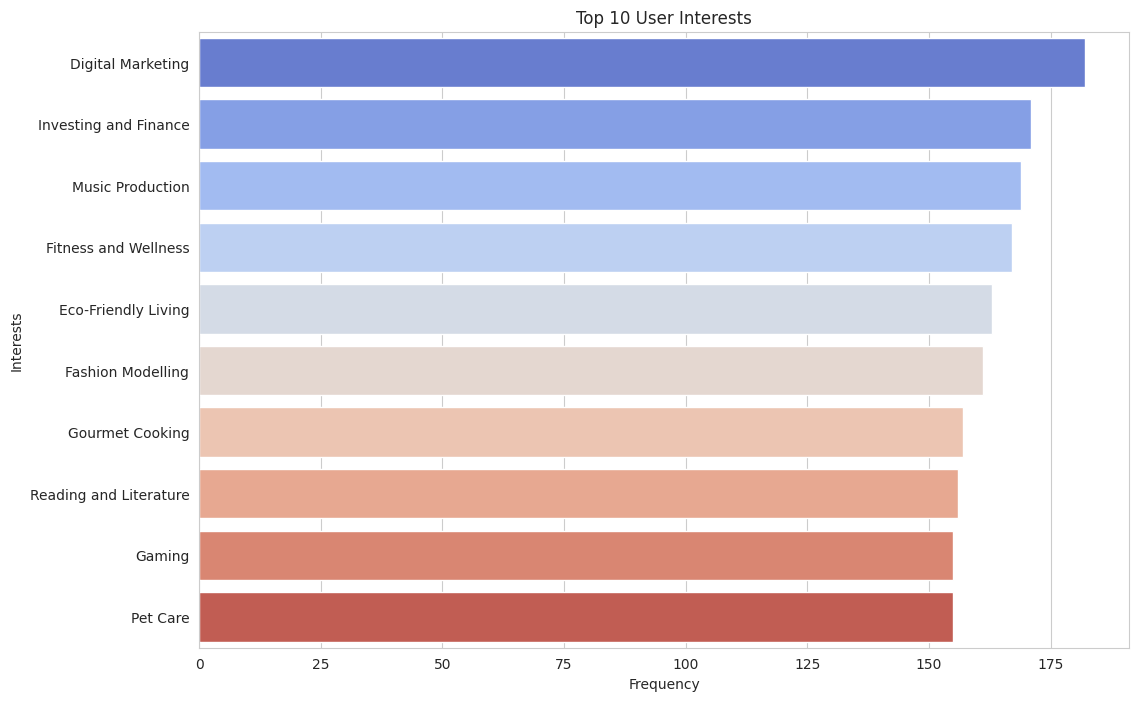

In [ ]:
from collections import Counter

# Splitting the 'Top Interests' column and creating a list of all interests
interest_list = data['Top Interests'].str.split(', ').sum()

# Counting frequency of each interest
interests_counter = Counter(interest_list)

# Converting counter object to DataFrame
interests_df = pd.DataFrame(interests_counter.items(), columns=['Interests', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plotting most common interests
plt.figure(figsize=(12,8))
sns.barplot(x='Frequency', y='Interests', data=interests_df.head(10), palette='coolwarm')
plt.title('Top 10 User Interests')
plt.xlabel('Frequency')
plt.ylabel('Interests')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# selecting features for clustering
features = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']

# separating the features we want to consider for clustering
X = data[features]

# defining preprocessing for numerical and categorical features
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()

categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

# combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=5, random_state=42))])

pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
data['Cluster'] = cluster_labels

print(data.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

In [ ]:
# computing the mean values of numerical features for each cluster
cluster_means = data.groupby('Cluster')[numeric_features].mean()

for feature in categorical_features:
    mode_series = data.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

print(cluster_means)

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                                                     
0                               1.632955                         6.135795   
1                               2.937500                         2.735000   
2                               3.364532                         6.151724   
3                               3.872986                         4.624171   
4                               1.558235                         3.769412   

         Likes and Reactions  Click-Through Rates (CTR)    Age  Gender  \
Cluster                                                                  
0                5480.022727                   0.173705  25-34    Male   
1                7462.233333                   0.152983  25-34    Male   
2                5997.108374                   0.058502  25-34    Male   
3                2409.625592                   0.167123  25-34  Female   
4               